<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-48/blob/main/Reto/Entrega2/Reto_Entrega_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Utilizando la base de datos que hayas elegido y hayas realizado su limpieza en la anterior entrega del reto, realiza lo siguiente:

- Selecciona tus variables independientes X y dependiente Y (semáforo)
Cambia a label encoding el semáforo, ej, de ["clase 1", "clase 2", "clase 3"] a [ 1,2,3]
- Realiza un análisis general de las features importances a traves de decision trees o random forest.
- Selecciona las variables de mayor importancia.
- Realiza tu clasificador, recuerda dividir los datos de manera balanceada (auxiliate de train test split)
- Explora que clasificador es el más optimo, ejemplo:
  - Decision trees
  - Random Forest.
- Determina el grado de exactitud a través del reporte de clasificación y análisis de la gráfica de Precision Recall.
- Visualiza los resultados del modelo o las predicciones a través de una matriz de confusión.
- Realiza un reporte de los principales hallazgos y conclusiones del experimento e incluyelos en una presentación ejecutiva de 10 diapositivas. La presentación deberá incluir todos los pasos del pipeline seguidos, limpieza, análisis, kmeans, clasificación, resultados y




# Elegir una base de datos, ya sea la de aguas superficiales o la de aguas subterráneas.

El dataset a utilizar es el de aguas subterráneas, dado que presenta una mayor cantidad de datos diferentes a **NaN** en comparación al dataset de aguas superficiales, lo que nos puede ayudar para tener mejores predicciones, a la hora de usar modelos de machine learning.



# Limpieza de base de datos

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

file="https://raw.githubusercontent.com/PosgradoMNA/actividades-del-projecto-equipo-48/main/Reto/Entrega1/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv"
dfsw=pd.read_csv(file,encoding = "ISO-8859-1")

In [ ]:
pd.set_option("display.max_columns",None) #mostramos todas las columnas
dfsw.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,Alta,940.0,Permisible para riego,NaN,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.732,Potable - Dura,<1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,0.0891,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,Alta,608.0,Buena para riego,NaN,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,<1.1,Potable - Excelente,5.75011,Potable - Buena calidad,0.0134,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,Alta,532.0,Buena para riego,NaN,342,Excelente para riego,Potable - Dulce,1.8045,Alta,120.719,Potable - Dura,<1.1,Potable - Excelente,1.449803,Potable - Excelente,0.037,No apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"FLUO,AS,",SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,Alta,686.0,Buena para riego,NaN,478.6,Excelente para riego,Potable - Dulce,1.1229,Potable - Optima,199.879,Potable - Dura,<1.1,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP,<0.003,Potable - Excelente,0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,Alta,1841.0,Permisible para riego,NaN,1179,Cultivos con manejo especial,Ligeramente salobres,0.2343,Baja,476.9872,Potable - Dura,291,Aceptable,15.672251,No apta como FAAP,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"NO3,",SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [ ]:
dfsw.info() #obtenemos información de cada columna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

Eliminamos el signo ${<}$ de todas las variables ordinales por motivos de practicidad

In [ ]:
to_numeric=['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL','N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']

for i in to_numeric:
  dfsw[i] = dfsw[i].astype("str")
  dfsw[i] = dfsw[i].str.replace("<","0")
  dfsw[i]= dfsw[i].astype("float")

Verificamos cuantos datos vacíos tiene nuestro dataframe

In [ ]:
dfsw.isnull().sum().sort_values(ascending=False)

SDT_mg/L                1068
CONTAMINANTES            434
CALIDAD_CONDUC             6
CONDUCT_mS/cm              6
ALC_mg/L                   4
CALIDAD_ALC                4
CALIDAD_SDT_ra             2
SDT_M_mg/L                 2
CALIDAD_SDT_salin          2
CALIDAD_N_NO3              1
CALIDAD_DUR                1
N_NO3_mg/L                 1
DUR_mg/L                   1
CUMPLE_CON_COND            0
CUMPLE_CON_ALC             0
SEMAFORO                   0
CALIDAD_FE                 0
FE_TOT_mg/L                0
CALIDAD_MN                 0
CUMPLE_CON_SDT_ra          0
CUMPLE_CON_SDT_salin       0
CLAVE                      0
CUMPLE_CON_FLUO            0
CUMPLE_CON_DUR             0
CALIDAD_PB                 0
CUMPLE_CON_CF              0
CUMPLE_CON_NO3             0
CUMPLE_CON_AS              0
CUMPLE_CON_CD              0
CUMPLE_CON_CR              0
CUMPLE_CON_HG              0
CUMPLE_CON_PB              0
CUMPLE_CON_MN              0
MN_TOT_mg/L                0
CD_TOT_mg/L   

Usames el siguiente bloque de codigo para conocer la cantidad de diferentes valores que cada columna contiene. Despues clasificarmos la forma en como seran tratados los datos nulos por columna , agregando el nombre de la columna las listas "fill_moda" o "fill_mediana".

In [ ]:
fill_moda = ["CALIDAD_ALC","CALIDAD_SDT_ra","CALIDAD_SDT_salin","CALIDAD_N_NO3","CALIDAD_DUR","CONTAMINANTES","CALIDAD_CONDUC"]
fill_mediana = ["CONDUCT_mS/cm","ALC_mg/L","SDT_M_mg/L","N_NO3_mg/L","DUR_mg/L"]
dropna = ["SDT_mg/L"]

Remplazamos por moda

In [ ]:
for c in fill_moda:
  dfsw[c].fillna(dfsw[c].mode()[0], inplace=True)

Remplazamos por mediana

In [ ]:
for c in fill_mediana:
  dfsw[c].fillna(dfsw[c].median(), inplace=True)

Mostramos la longitud del dataset

In [ ]:
len(dfsw)

1068

Como se puede apreciar la columna SDT_mg/L se encuentra vacía en su totalidad, por lo cual se procederá a eliminarla

Usamos el método drop para eliminar la columna con valores vacíos

In [ ]:
dfsw.drop("SDT_mg/L",axis=1,inplace=True)

Verificamos que ya no exitan datos nulos en el dataset

In [ ]:
dfsw.isnull().sum().sort_values(ascending=False)

CLAVE                   0
SITIO                   0
CALIDAD_CR              0
HG_TOT_mg/L             0
CALIDAD_HG              0
PB_TOT_mg/L             0
CALIDAD_PB              0
MN_TOT_mg/L             0
CALIDAD_MN              0
FE_TOT_mg/L             0
CALIDAD_FE              0
SEMAFORO                0
CONTAMINANTES           0
CUMPLE_CON_ALC          0
CUMPLE_CON_COND         0
CUMPLE_CON_SDT_ra       0
CUMPLE_CON_SDT_salin    0
CUMPLE_CON_FLUO         0
CUMPLE_CON_DUR          0
CUMPLE_CON_CF           0
CUMPLE_CON_NO3          0
CUMPLE_CON_AS           0
CUMPLE_CON_CD           0
CUMPLE_CON_CR           0
CUMPLE_CON_HG           0
CUMPLE_CON_PB           0
CUMPLE_CON_MN           0
CR_TOT_mg/L             0
CALIDAD_CD              0
CD_TOT_mg/L             0
CALIDAD_CONDUC          0
ORGANISMO_DE_CUENCA     0
ESTADO                  0
MUNICIPIO               0
ACUIFERO                0
SUBTIPO                 0
LONGITUD                0
LATITUD                 0
PERIODO     

Como sabemos muchos modelos no toman en cuenta strings como entrada, es por esto que podemos encodificar estas variables con 0 y 1 mediante el metodo get_dummies() para convertir variables categoricas en dummy variables.

In [ ]:
dfsw["CONTAMINANTES"].value_counts()

FLUO,                                            512
DT,                                               65
FLUO,AS,                                          51
CF,                                               31
AS,                                               31
                                                ... 
ALC,CONDUC,SDT_ra,SDT_salin,DT,NO3,                1
ALC,CONDUC,SDT_ra,SDT_salin,FLUO,DT,AS,MN,FE,      1
PB,MN,FE,                                          1
ALC,AS,FE,                                         1
ALC,DT,NO3,                                        1
Name: CONTAMINANTES, Length: 126, dtype: int64

In [ ]:
dftmp = dfsw["CONTAMINANTES"].str.get_dummies(sep=',')
clean_dfsw = pd.concat([dfsw,dftmp], axis=1)
clean_dfsw.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,ALC,AS,CD,CF,CONDUC,CR,DT,FE,FLUO,HG,MN,NI,NO3,PB,SDT_ra,SDT_salin
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,Alta,940.0,Permisible para riego,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.7320,Potable - Dura,1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.0891,Potable - Excelente,Verde,"FLUO,",SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,Alta,608.0,Buena para riego,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,1.1,Potable - Excelente,5.750110,Potable - Buena calidad,0.0134,Apta como FAAP,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.0250,Potable - Excelente,Verde,"FLUO,",SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,Alta,532.0,Buena para riego,342.0,Excelente para riego,Potable - Dulce,1.8045,Alta,120.7190,Potable - Dura,1.1,Potable - Excelente,1.449803,Potable - Excelente,0.0370,No apta como FAAP,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.0250,Potable - Excelente,Rojo,"FLUO,AS,",SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,Alta,686.0,Buena para riego,478.6,Excelente para riego,Potable - Dulce,1.1229,Potable - Optima,199.8790,Potable - Dura,1.1,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.0250,Potable - Excelente,Verde,"FLUO,",SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,Alta,1841.0,Permisible para riego,1179.0,Cultivos con manejo especial,Ligeramente salobres,0.2343,Baja,476.9872,Potable - Dura,291.0,Aceptable,15.672251,No apta como FAAP,0.0100,Potable - Excelente,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.0250,Potable - Excelente,Rojo,"NO3,",SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


Eliminamos la columna contaminantes, ya que la hemos convertido en columnas dummy

In [ ]:
clean_dfsw.drop("CONTAMINANTES",axis=1,inplace=True)

In [ ]:
df = clean_dfsw.copy()

# Exploracion de datos

- **Identificando tendencias centrales promedio, media de los datos.** 
- **Identificando medidas de dispersión, máximo, mínimo .**

In [ ]:
df.describe()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L,ALC,AS,CD,CF,CONDUC,CR,DT,FE,FLUO,HG,MN,NI,NO3,PB,SDT_ra,SDT_salin
count,1068.000000,1068.000000,1068.0,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000
mean,-101.891007,23.163618,2020.0,235.558455,1137.133052,895.454185,1.075600,347.842003,355.490356,4.317663,0.019618,0.003030,0.013276,0.000557,0.005282,0.072478,0.410387,0.055243,0.118914,0.001873,0.057116,0.115169,0.014045,0.211610,0.127341,0.586142,0.000936,0.080524,0.001873,0.076779,0.011236,0.066479,0.066479
std,6.703263,3.887670,0.0,116.661485,1242.292889,2748.991295,1.924278,359.514579,2052.457014,8.341504,0.035209,0.000894,0.154391,0.000467,0.003254,0.376512,5.537974,0.228562,0.323839,0.043254,0.232173,0.319375,0.117731,0.408641,0.333511,0.492754,0.030600,0.272231,0.043254,0.266365,0.105452,0.249235,0.249235
min,-116.664250,14.561150,2020.0,26.640000,50.400000,25.000000,0.200000,20.000000,1.100000,0.020000,0.010000,0.003000,0.005000,0.000500,0.005000,0.001500,0.025000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-105.388865,20.212055,2020.0,164.048750,505.500000,337.700000,0.267175,121.274100,1.100000,0.650932,0.010000,0.003000,0.005000,0.000500,0.005000,0.001500,0.025000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-102.174180,22.617190,2020.0,215.527500,815.000000,550.400000,0.503500,245.335800,1.100000,2.080932,0.010000,0.003000,0.005000,0.000500,0.005000,0.001500,0.046960,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-98.974716,25.510285,2020.0,292.423750,1321.250000,915.900000,1.139850,453.930000,13.250000,5.200047,0.010000,0.003000,0.005000,0.000500,0.005000,0.009947,0.173380,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,-86.864120,32.677713,2020.0,1650.000000,18577.000000,82170.000000,34.803300,3810.692200,24196.000000,121.007813,0.452200,0.032110,5.003200,0.014150,0.080900,8.982000,178.615000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Identificamos Mediana de los datos**

In [ ]:
df.median()

LONGITUD               -102.174180
LATITUD                  22.617190
PERIODO                2020.000000
ALC_mg/L                215.527500
CONDUCT_mS/cm           815.000000
SDT_M_mg/L              550.400000
FLUORUROS_mg/L            0.503500
DUR_mg/L                245.335800
COLI_FEC_NMP/100_mL       1.100000
N_NO3_mg/L                2.080932
AS_TOT_mg/L               0.010000
CD_TOT_mg/L               0.003000
CR_TOT_mg/L               0.005000
HG_TOT_mg/L               0.000500
PB_TOT_mg/L               0.005000
MN_TOT_mg/L               0.001500
FE_TOT_mg/L               0.046960
ALC                       0.000000
AS                        0.000000
CD                        0.000000
CF                        0.000000
CONDUC                    0.000000
CR                        0.000000
DT                        0.000000
FE                        0.000000
FLUO                      1.000000
HG                        0.000000
MN                        0.000000
NI                  

**Identificar medidas de posición no centrales , cuartiles , outliers**

### **Boxplot**

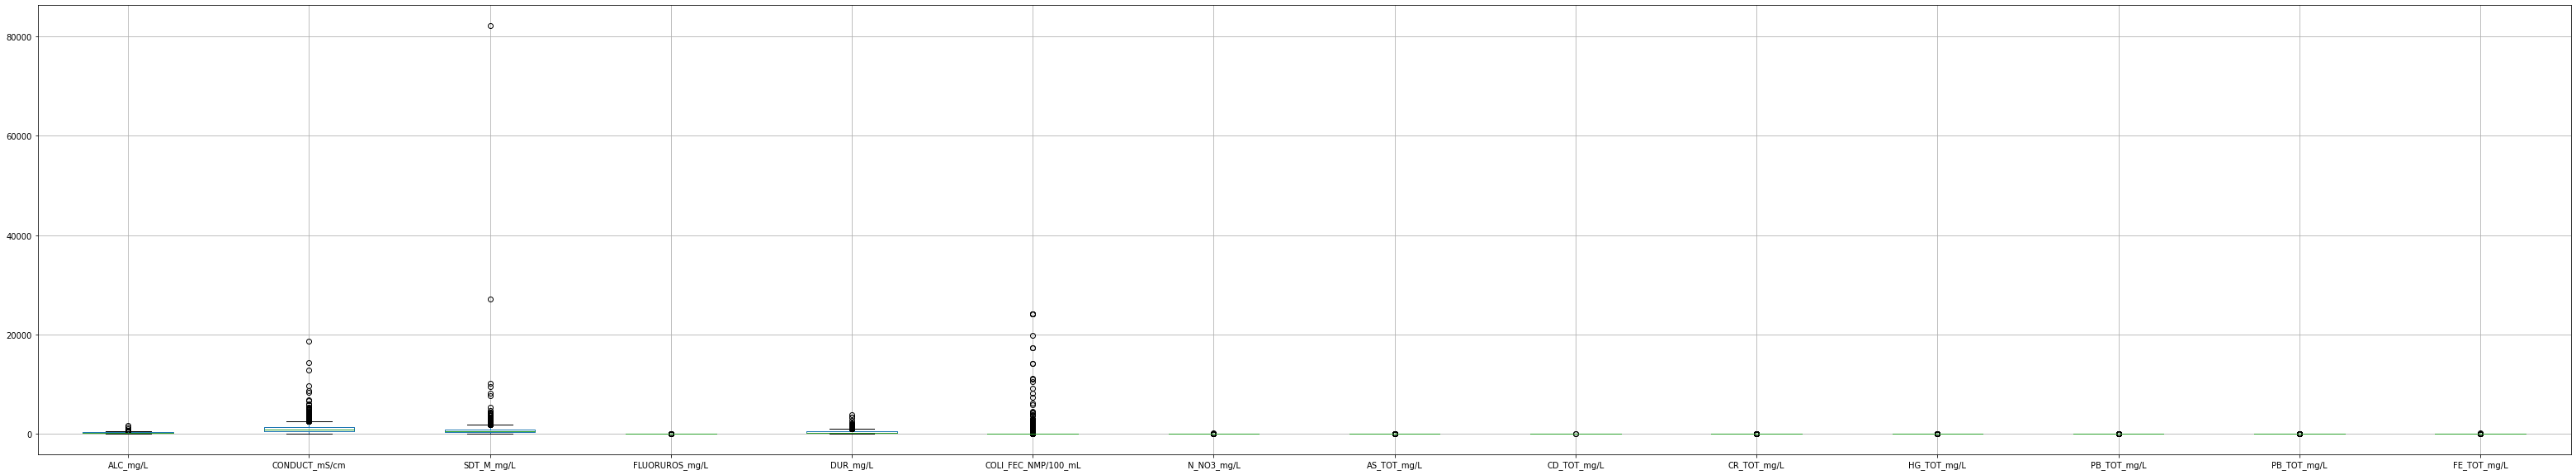

In [ ]:
import matplotlib.pyplot as plt
numerical_columns=["ALC_mg/L","CONDUCT_mS/cm","SDT_M_mg/L","FLUORUROS_mg/L","DUR_mg/L","COLI_FEC_NMP/100_mL","N_NO3_mg/L","AS_TOT_mg/L","CD_TOT_mg/L","CR_TOT_mg/L","HG_TOT_mg/L","PB_TOT_mg/L","PB_TOT_mg/L","FE_TOT_mg/L"]
df[numerical_columns].boxplot(figsize=(55,10))


Estandarizamos los datos para una mejor visualizacion del boxplot.

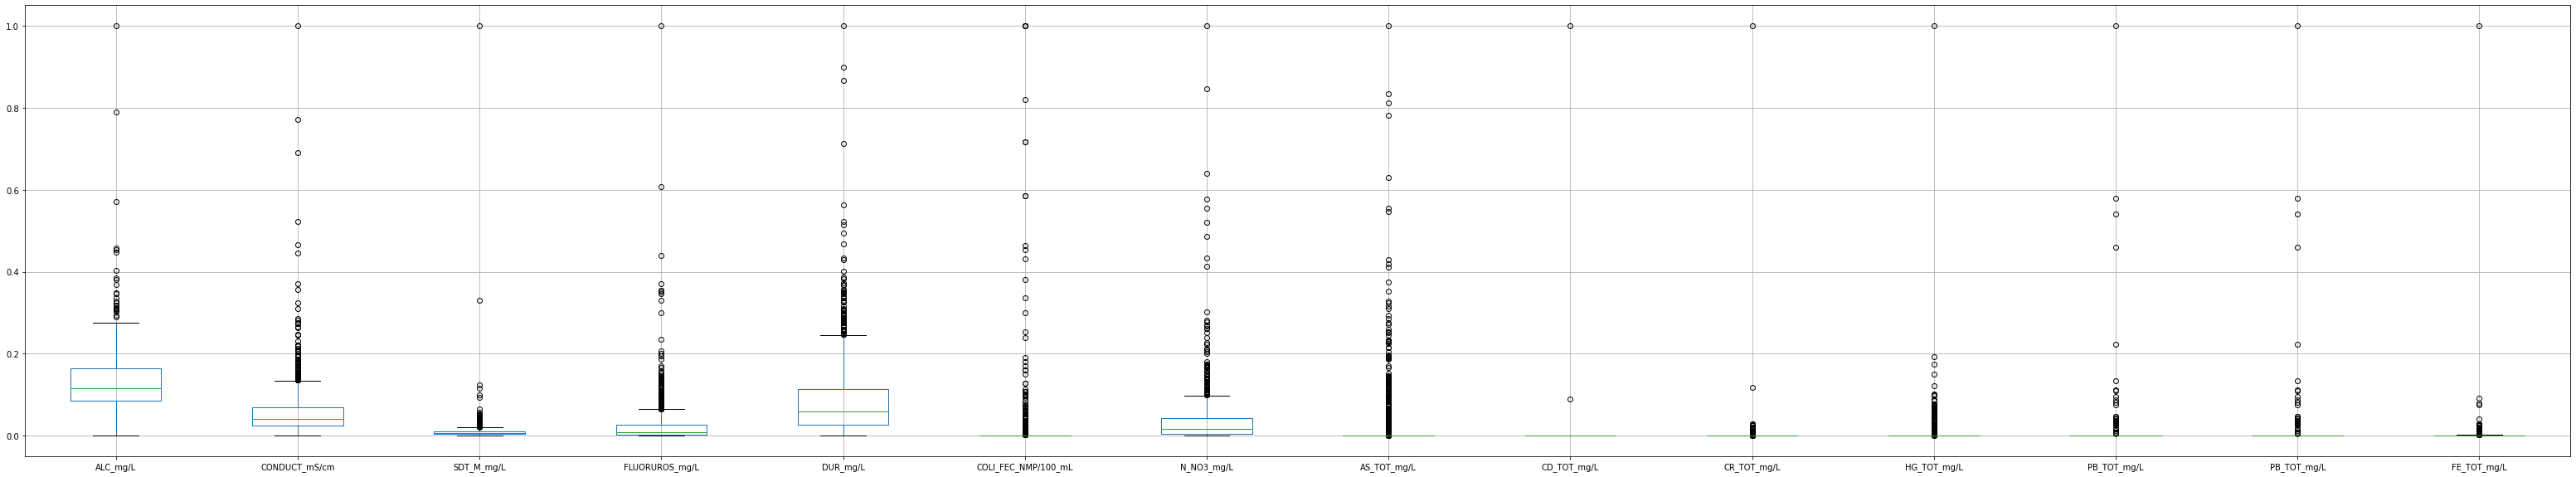

In [ ]:
from sklearn.preprocessing import MinMaxScaler

df_outlier = df[numerical_columns].copy()
scaler = MinMaxScaler()
df_outlier = scaler.fit_transform(df_outlier)

df_outlier=pd.DataFrame(df_outlier)
df_outlier.columns= numerical_columns
df_outlier.boxplot(figsize=(55,10))

### **Visualizacion de la distribucion de atributos con histograma**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffb4cf99490>,
      dtype=object)

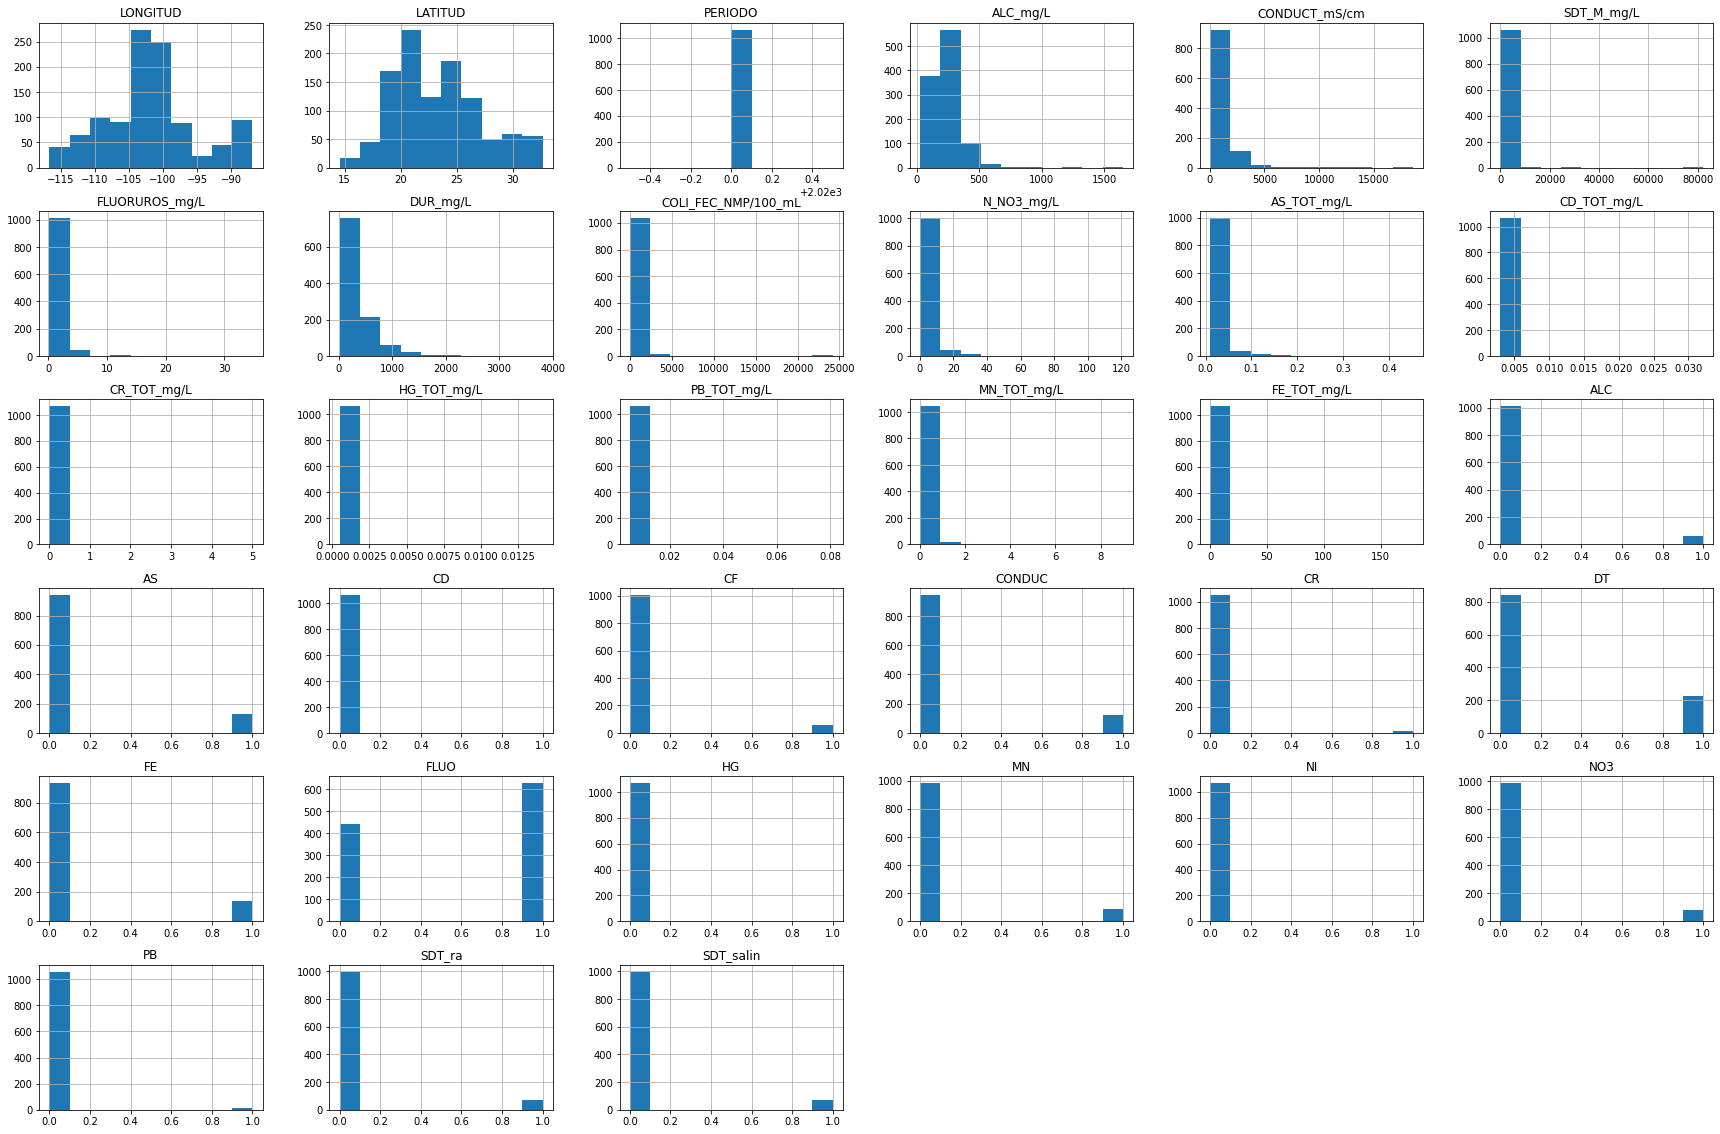

In [ ]:
df.hist(figsize=(30,20))

## Identificar correlaciones

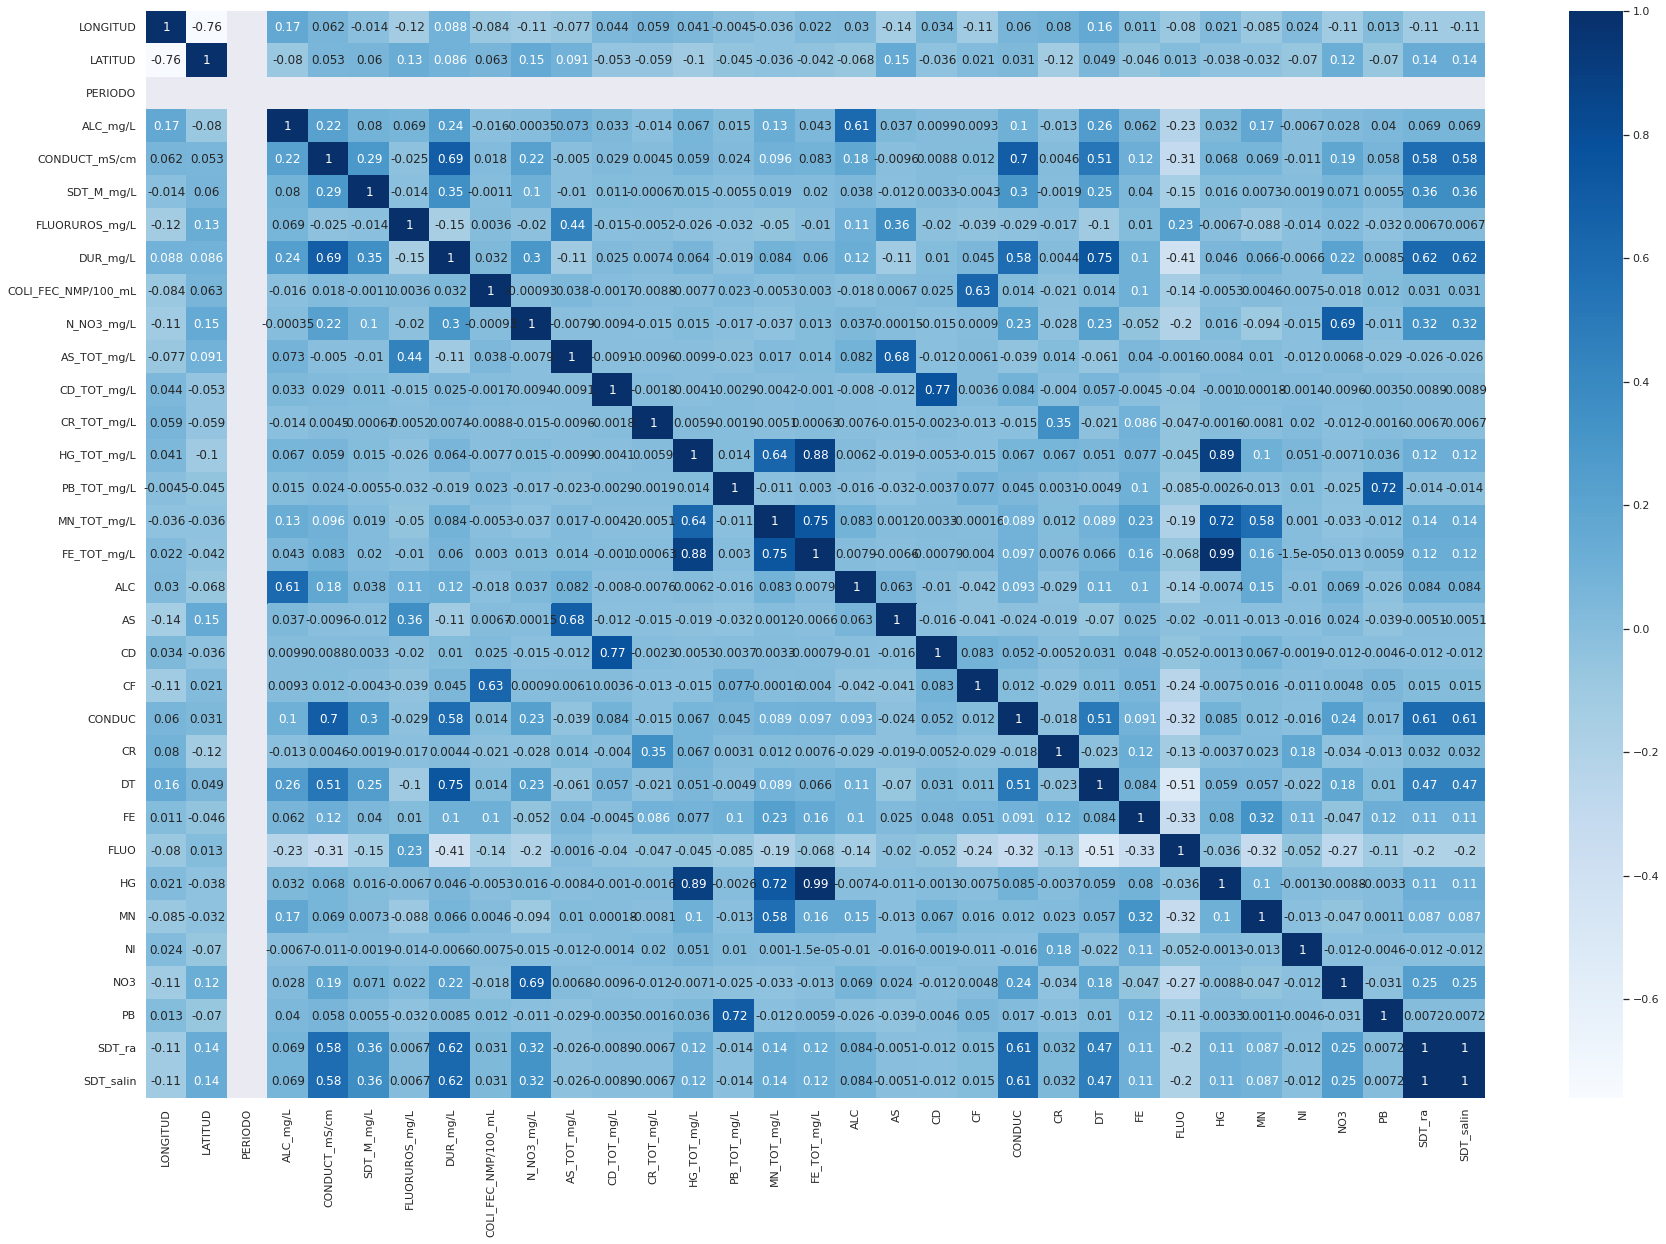

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(30,20)})
ax = sns.heatmap(df.corr(), cmap='Blues', annot=True)
plt.show()
